### 多元线性回归中的梯度下降

 $-\eta\,\nabla J=-\eta \, ( \dfrac {\partial J}{\partial b},\dfrac {\partial J}{\partial w_{1}},\dfrac {\partial J}{\partial w_{2}} ,\ldots ,\dfrac {\partial J}{\partial w_{n}})$
 
 <img src="../img/2.png" width="500" align="left"/>

 <img src="../img/3.png" width="500" align="left"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666) # 设置随机种子
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100) # np.random.normal(size=100) 为正态分布的噪音

In [3]:
# 统一化为二维数组 (里面有一个列向量)
X = x.reshape(-1,1)
X.shape
y.shape

(100, 1)

(100,)

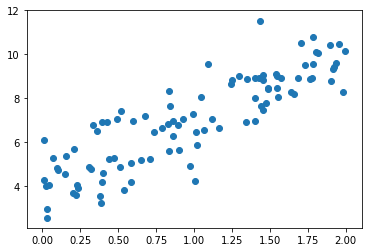

In [4]:
plt.scatter(x,y)
plt.show()

### 使用梯度下降法训练

In [5]:
# W = (b;W) X_b = [[1,X1],[1,X2]....]
def J(W,X_b,y):
    try:
        return np.sum((y-X_b.dot(W))**2) / len(y)
    except:
        return float('inf')

In [6]:
def dJ(W,X_b,y):
    res=np.empty(len(W))
    res[0] = np.sum((X_b.dot(W) - y))
    for i in range(1,len(W)):
         res[i] = np.sum((X_b.dot(W) - y).dot(X_b[:,i]))
    return res * 2 / len(y)

In [7]:
def gradient_descent(init_w,X,y,eta=0.01,epsilon=1e-8,n_iters=1e4,init_b=0.):
    
    # 补1
    X_b = np.hstack([np.ones((len(X),1)),X])
    # 补b
    W = np.hstack([init_b,init_w])
    
    i_iter=0
    while i_iter<n_iters:
        grad=dJ(W,X_b,y)
        last_W=W
        W=W-eta*grad
        if(abs(J(W,X_b,y)-J(last_W,X_b,y)) < epsilon):
            break
        i_iter += 1    
    return W

In [8]:
init_w = np.zeros(X.shape[1])
eta=0.01

W_ = gradient_descent(init_w,X,y,eta)

print("b:",W_[0])
print("w:",W_[1:])

b: 4.021457858204859
w: [3.00706277]


### 梯度下降中的向量化和数据标准化

 <img src="../img/4.png" width="500" align="left"/>

$\nabla J=\dfrac {2}{m}\cdot X^{T}_{b}\left( X_{b}\cdot W-y\right) $

In [9]:
# 向量化计算梯度
def dJ_vector(W,X_b,y):
    return X_b.T.dot(X_b.dot(W) - y) * 2. / len(y)

In [10]:
# 向量化版
def gradient_descent_vector(init_w,X,y,eta=0.01,epsilon=1e-8,n_iters=1e4,init_b=0.):
    
    # 补1
    X_b = np.hstack([np.ones((len(X),1)),X])
    # 补b
    W = np.hstack([init_b,init_w])
    
    i_iter=0
    while i_iter<n_iters:
        grad=dJ_vector(W,X_b,y)
        last_W=W
        W=W-eta*grad
        if(abs(J(W,X_b,y)-J(last_W,X_b,y)) < epsilon):
            break
        i_iter += 1    
    return W

### 导入真实数据进行训练并与正规方程解进行对比

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
x=boston.data
y=boston.target

x=x[y<50]
y=y[y<50]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=666)

# 预测函数
def predict_normal(W,X_test):
        X_b = np.hstack([np.ones((len(X_test),1)),X_test])
        y_hat = X_b.dot(W)
        return y_hat

# 引入R^2进行评价
from sklearn.metrics import r2_score

#### 正规方程解

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
%time lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

print("系数:",lin_reg.coef_)
print("截距:",lin_reg.intercept_)

CPU times: user 11.6 ms, sys: 1.77 ms, total: 13.3 ms
Wall time: 14.4 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.8129794056212809

系数: [-1.20354261e-01  3.64423279e-02 -3.61493155e-02  5.12978140e-02
 -1.15775825e+01  3.42740062e+00 -2.32311760e-02 -1.19487594e+00
  2.60101728e-01 -1.40219119e-02 -8.35430488e-01  7.80472852e-03
 -3.80923751e-01]
截距: 34.117399723229845


#### 使用梯度下降法

In [13]:
init_w = np.zeros(X_train.shape[1])

gradient_descent_vector(init_w,X_train,y_train)

X_train[:5]

/Users/zc/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/zc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/Users/zc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

array([[1.42362e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.34300e+00, 1.00000e+02, 1.57410e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.03200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.89250e+02, 6.05000e+00],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.70100e+00, 9.50000e+01, 3.78720e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.58770e+02, 1.83500e+01],
       [6.58800e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.76500e+00, 8.33000e+01, 2.74100e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.95560e+02, 7.56000e+00]])

**1. 真实数据之间的差距较大，相比较我们学习率太大，所以结果无法收敛，我们应该降低学习率**

In [14]:
W_ = gradient_descent_vector(init_w,X_train,y_train,eta=1e-6)

r2_score(y_test,predict_normal(W_,X_test))

print("系数:",W_[1:])
print("截距:",W_[0])

0.27586818724477247

系数: [-0.10245704  0.11535876 -0.06248791  0.00207516  0.00447152  0.11954208
  0.04684195  0.03460927 -0.00452122  0.00324507  0.1271939   0.04484862
 -0.22542441]
截距: 0.011951606011577695


**2. 我们结果不是很好，有可能是学习率太小，使得我们在限定步数内梯度没有下降到最优点，我们尝试应该增大限定步数继续下降梯度**

In [15]:
%time W_ = gradient_descent_vector(init_w,X_train,y_train,eta=1e-6,n_iters=1e6)

r2_score(y_test,predict_normal(W_,X_test))

print("系数:",W_[1:])
print("截距:",W_[0])

CPU times: user 1min 5s, sys: 123 ms, total: 1min 5s
Wall time: 32.9 s


0.7542932581943915

系数: [-1.07889200e-01  5.91494760e-02 -5.72920411e-02  1.19334353e-01
  2.07223623e-01  3.91254775e+00  1.50564949e-03 -5.36511902e-01
  1.13424276e-01 -9.76209406e-03  5.35544815e-02  1.58440412e-02
 -3.78786162e-01]
截距: 0.43522123962172593


**3. 现在我们准确率有所提升，但还不是很理想，而且训练耗时较长
这很有可能是因为数据各个特征量级相差较大，我们应该尝试对数据做归一化处理**

<br/>
 <img src="../img/5.png" width="500" align="left"/>

In [16]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)

X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
%time W_ = gradient_descent_vector(init_w,X_train,y_train)

r2_score(y_test,predict_normal(W_,X_test))

print("系数:",W_[1:])
print("截距:",W_[0])

CPU times: user 308 ms, sys: 1.52 ms, total: 309 ms
Wall time: 158 ms


0.8129873310487505

系数: [-1.04042202  0.83093351 -0.24794356  0.01179456 -1.35034756  2.25074
 -0.66384353 -2.53568774  2.25572406 -2.34011572 -1.76565394  0.70923397
 -2.72677064]
截距: 21.500765306122382


#### 梯度下降法的优势

In [18]:
m = 1000
n = 50000

big_X = np.random.normal(size=(m, n))

true_W = np.random.uniform(0.0, 100.0, size=n+1)

big_y = big_X.dot(true_W[1:]) + true_W[0] + np.random.normal(0., 10., size=m)

In [19]:
lin_reg = LinearRegression()
%time lin_reg.fit(big_X,big_y)

CPU times: user 6.35 s, sys: 539 ms, total: 6.89 s
Wall time: 3.87 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
%time W_ = gradient_descent_vector(np.zeros(n),big_X,big_y)

CPU times: user 2.18 s, sys: 128 ms, total: 2.3 s
Wall time: 1.2 s


* 维数越大梯度下降法优势越明显，同时正规方程解的复杂度越大
* 但样本数量很影响梯度下降法的性能，因为梯度计算的过程要每一个数据都要参与计算，所以我们将引入随机梯度下降法来优化